In [41]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import gc
import xarray as xr
import xrft as xrft
# import cartopy as cp
import sys
sys.path.append("/homes/metogra/iufarias/Documents/Scripts/useful")
import romspickle as rp
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [4]:
path='/data/pacific/lrenault/SASI/CROCO/FULL/'
listm=glob(path+'surf*.nc');listm.sort()
# varf=xr.open_dataset(listm[-9:][xmon])
varf=xr.open_mfdataset(listm[1:])

path='/data/pacific/lrenault/SASI/CROCO/SMTH/'
listt=glob(path+'surf*SASI_6h_his_20*_*.nc');listt.sort()
listt.append('/data/pacific/lrenault/SASI/CROCO/SMTH/surf_SASI_6h_his_2012-07.nc')
#vart=xr.open_dataset(listt[xmon])
vart=xr.open_mfdataset(listt[1:])



In [118]:
varf

<xarray.Dataset>
Dimensions:              (y_rho: 1520, x_rho: 1000, y_u: 1520, x_u: 999, y_v: 1519, x_v: 1000, time_counter: 852, y_w: 1520, x_w: 1000, axis_nbounds: 2)
Coordinates:
    nav_lat_rho          (y_rho, x_rho) float32 dask.array<chunksize=(1520, 1000), meta=np.ndarray>
    nav_lon_rho          (y_rho, x_rho) float32 dask.array<chunksize=(1520, 1000), meta=np.ndarray>
    nav_lat_u            (y_u, x_u) float32 dask.array<chunksize=(1520, 999), meta=np.ndarray>
    nav_lon_u            (y_u, x_u) float32 dask.array<chunksize=(1520, 999), meta=np.ndarray>
    nav_lat_v            (y_v, x_v) float32 dask.array<chunksize=(1519, 1000), meta=np.ndarray>
    nav_lon_v            (y_v, x_v) float32 dask.array<chunksize=(1519, 1000), meta=np.ndarray>
    nav_lat_w            (y_w, x_w) float32 dask.array<chunksize=(1520, 1000), meta=np.ndarray>
    nav_lon_w            (y_w, x_w) float32 dask.array<chunksize=(1520, 1000), meta=np.ndarray>
    time_instant         (time_counter) datetime64[ns] dask.array<chunksize=(124,), meta=np.ndarray>
  * time_counter         (time_counter) datetime64[ns] 2012-01-01T06:00:00 .....
Dimensions without coordinates: y_rho, x_rho, y_u, x_u, y_v, x_v, y_w, x_w, axis_nbounds
Data variables: (12/43)
    s_rho                (time_counter) float32 -0.00625 -0.00625 ... -0.00625
    s_w                  (time_counter) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    time_instant_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(124, 2), meta=np.ndarray>
    time_counter_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(124, 2), meta=np.ndarray>
    hc                   (time_counter) float64 200.0 200.0 ... 200.0 200.0
    theta_s              (time_counter) float64 6.0 6.0 6.0 6.0 ... 6.0 6.0 6.0
    ...                   ...
    v                    (time_counter, y_v, x_v) float32 dask.array<chunksize=(124, 1519, 1000), meta=np.ndarray>
    w                    (time_counter, y_rho, x_rho) float32 dask.array<chunksize=(124, 1520, 1000), meta=np.ndarray>
    omega                (time_counter, y_w, x_w) float32 dask.array<chunksize=(124, 1520, 1000), meta=np.ndarray>
    temp                 (time_counter, y_rho, x_rho) float32 dask.array<chunksize=(124, 1520, 1000), meta=np.ndarray>
    salt                 (time_counter, y_rho, x_rho) float32 dask.array<chunksize=(124, 1520, 1000), meta=np.ndarray>
    rho                  (time_counter, y_rho, x_rho) float32 dask.array<chunksize=(124, 1520, 1000), meta=np.ndarray>
Attributes: (12/49)
    name:                      Out/AVG_Y2012M01/SASI_6h_his
    description:               Created by xios
    Conventions:               CF-1.6
    timeStamp:                 2020-Jul-30 22:12:58 GMT
    uuid:                      1e6e6c86-13c6-4527-ac3f-51b9c243770b
    title:                     SASI
    ...                        ...
    sponge_expl:               Sponge parameters : extent (m) & viscosity (m2...
    SRCS:                      main.F step.F read_inp.F timers_roms.F init_sc...
    CPP-options:               REGIONAL SASI DIAGNOSTICS_EDDY DIAGNOSTICS_TS ...
    history:                   Sun Apr 17 12:57:27 2022: ncwa -a s_rho tmp2.n...
    NCO:                       "4.6.0"
    nco_openmp_thread_number:  1

In [78]:
def fig1(sizeh,sizev,lnmn,lnmx,ltmn,ltmx,grid_a=0.01):
    plt.rcParams['font.size']=15
    plt.rcParams['font.sans-serif']='Arial'
    plt.rcParams['font.family'] = "sans-serif"
    plt.rcParams['font.weight']='bold'


    fig = plt.figure(figsize=(sizeh,sizev))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([lnmn, lnmx, ltmn, ltmx], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND.with_scale('10m'),edgecolor='none')
    ax.add_feature(cfeature.LAKES.with_scale('10m'))


    # ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
    ax.add_feature(cfeature.STATES.with_scale('10m'))


    ax = plt.axes(projection=ccrs.PlateCarree())
    gl = ax.gridlines(draw_labels=True,alpha=grid_a)
    gl.ylabels_right = False
    gl.xlabels_top = False

In [53]:
#common grids
ufnew,vfnew,wfnew=rp.uvw2rho_3d(varf.u,varf.v,varf.w)
utnew,vtnew,wtnew=rp.uvw2rho_3d(vart.u,vart.v,vart.w)

xlat,xlon=varf.nav_lat_rho[1:-1,1:-1],varf.nav_lon_rho[1:-1,1:-1]

In [72]:
usf,vsf,_=rp.uvw2rho_3d(varf.sustr,varf.svstr,varf.w)
ust,vst,_=rp.uvw2rho_3d(vart.sustr,vart.svstr,vart.w)

In [87]:
tf=varf.temp[:,1:-1,1:-1]
tt=varf.temp[:,1:-1,1:-1]

/homes/metogra/iufarias/miniconda3/envs/ROMS/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/homes/metogra/iufarias/miniconda3/envs/ROMS/lib/python3.7/site-packages/dask/array/core.py:1600: FutureWarning: The `numpy.column_stack` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  FutureWarning,
/homes/metogra/iufarias/miniconda3/envs/ROMS/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a f

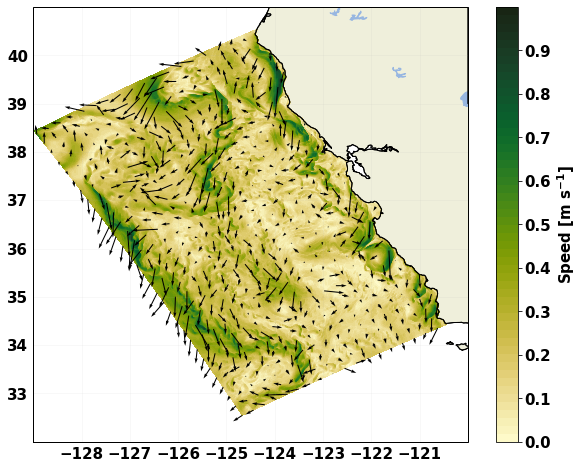

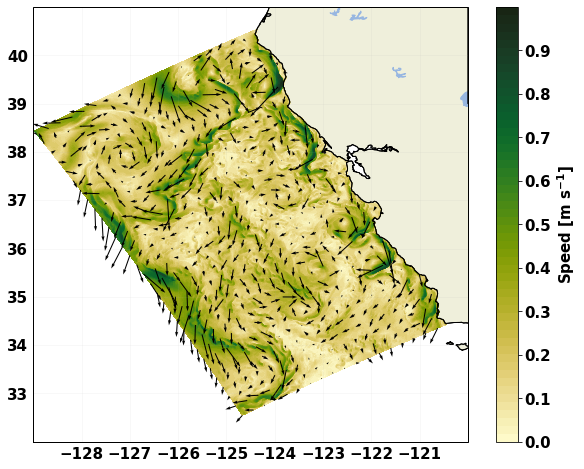

In [128]:
dec=50
dd=200
fig1(sizeh=10,sizev=8,lnmn=-129,lnmx=-120,ltmn=32,ltmx=41,grid_a=0.1)
cb=plt.contourf(xlon,xlat,np.sqrt(ufnew[dd].data**2+vfnew[dd].data**2),cmap=cm.cm.speed,levels=np.linspace(0,1,55))
plt.quiver(xlon[::dec,::dec],xlat[::dec,::dec],ufnew[30,::dec,::dec].data,vfnew[dd,::dec,::dec].data)
cb1=plt.colorbar(cb)
cb1.set_label(r'Speed [m s$^{-1}$]',fontweight='bold') 
cb1.set_ticks(np.arange(0,1,0.1))
plt.savefig('/homes/metogra/iufarias/Documents/figures/slide_aid/speed_f.png')



fig1(sizeh=10,sizev=8,lnmn=-129,lnmx=-120,ltmn=32,ltmx=41,grid_a=0.1)
cb=plt.contourf(xlon,xlat,np.sqrt(utnew[dd].data**2+vtnew[dd].data**2),cmap=cm.cm.speed,levels=np.linspace(0,1,55))
plt.quiver(xlon[::dec,::dec],xlat[::dec,::dec],utnew[dd,::dec,::dec].data,vtnew[dd,::dec,::dec].data)
cb2=plt.colorbar(cb)
cb2.set_label(r'Speed [m s$^{-1}$]',fontweight='bold') 
cb2.set_ticks(np.arange(0,1,0.1))
plt.savefig('/homes/metogra/iufarias/Documents/figures/slide_aid/speed_t.png')



/homes/metogra/iufarias/miniconda3/envs/ROMS/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/homes/metogra/iufarias/miniconda3/envs/ROMS/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


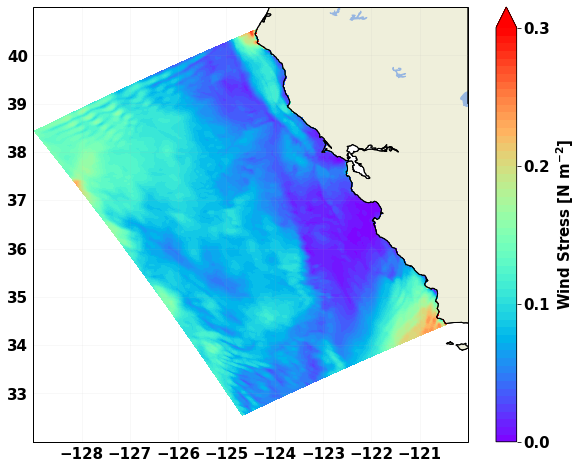

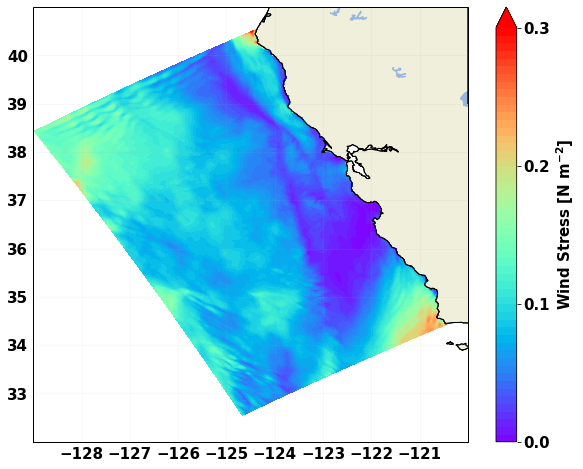

In [126]:
fig1(sizeh=10,sizev=8,lnmn=-129,lnmx=-120,ltmn=32,ltmx=41,grid_a=0.1)
cb=plt.contourf(xlon,xlat,np.sqrt(usf[dd].data**2+vsf[dd].data**2),cmap='rainbow',levels=np.linspace(0,0.3,55),extend='max')
cb1=plt.colorbar(cb)
cb1.set_label(r'Wind Stress [N m$^{-2}$]',fontweight='bold') 
cb1.set_ticks(np.arange(0,0.4,0.1))
plt.savefig('/homes/metogra/iufarias/Documents/figures/slide_aid/stress_f.png')



fig1(sizeh=10,sizev=8,lnmn=-129,lnmx=-120,ltmn=32,ltmx=41,grid_a=0.1)
cb=plt.contourf(xlon,xlat,np.sqrt(ust[dd].data**2+vst[dd].data**2),cmap='rainbow',levels=np.linspace(0,0.3,55),extend='max')
cb2=plt.colorbar(cb)
cb2.set_label(r'Wind Stress [N m$^{-2}$]',fontweight='bold') 
cb2.set_ticks(np.arange(0,0.4,0.1))
plt.savefig('/homes/metogra/iufarias/Documents/figures/slide_aid/stress_t.png')



In [122]:
pwd

'/homes/metogra/iufarias/Documents/Scripts/1_WRF+surface'

/homes/metogra/iufarias/miniconda3/envs/ROMS/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


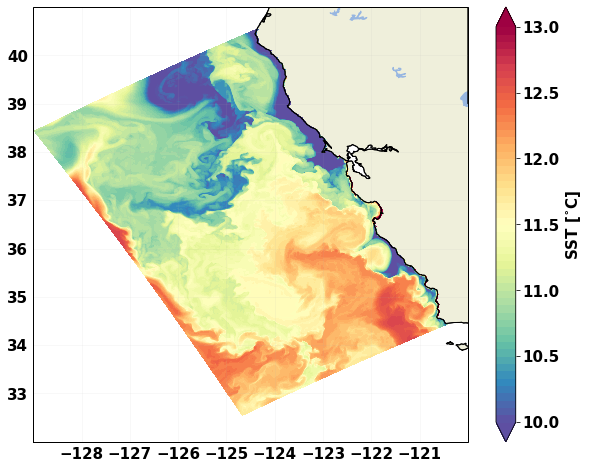

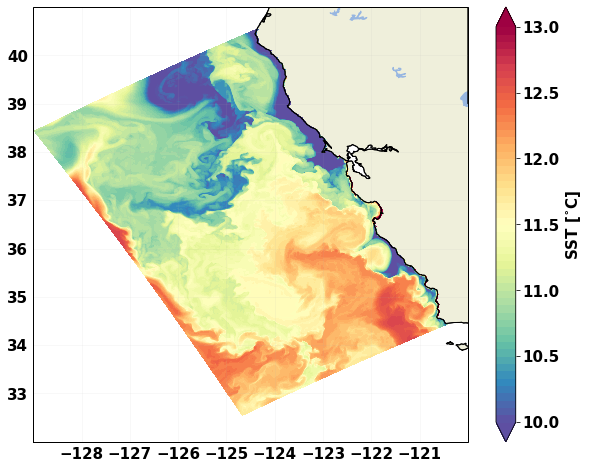

In [127]:
fig1(sizeh=10,sizev=8,lnmn=-129,lnmx=-120,ltmn=32,ltmx=41,grid_a=0.1)
cb=plt.contourf(xlon,xlat,tf[dd],cmap='Spectral_r',levels=np.linspace(10,13,55),extend='both')
cb1=plt.colorbar(cb)
cb1.set_label(r'SST [$^{\circ}$C]',fontweight='bold') 
cb1.set_ticks(np.arange(10,13.5,0.5))
plt.savefig('/homes/metogra/iufarias/Documents/figures/slide_aid/sst_f.png')

fig1(sizeh=10,sizev=8,lnmn=-129,lnmx=-120,ltmn=32,ltmx=41,grid_a=0.1)
cb=plt.contourf(xlon,xlat,tt[dd],cmap='Spectral_r',levels=np.linspace(10,13,55),extend='both')
cb2=plt.colorbar(cb)
cb2.set_label(r'SST [$^{\circ}$C]',fontweight='bold') 
cb2.set_ticks(np.arange(10,13.5,0.5))
plt.savefig('/homes/metogra/iufarias/Documents/figures/slide_aid/sst_t.png')

